# Comparing Models of Classifiers and the way of predicting the best among classifiers

##### (WEKA HERE CONSIDERDED AS PYTHON/JUPYPTER NOTEBOOK) imported the CSV file and processed the model as per requirements

#### 1.1. Examine the dataset carefully in the Weka Explorer. You should investigate some of the filters in Weka which allow you to normalise and/or clean the dataset as appropriate. Describe the data preparation/cleaning steps you took if any (e.g., Your description may look like ”I did min-max normalisation of feature X using the minimum on the feature values in training examples and maximum of feature values over all labelled examples. I manually removed feature Y because …”).


#### Solution: Min- Max Normalization, done using the OneHotEncoder & LabelEncoder, data I had is of maximum with clean arbitraries and no null or special characters ,onehot encoding is used to shuffel the existing subsets into uniques values each, where as the label encoder assign the values to binary were system can only understand this language.

In [24]:
import pandas as pd

In [25]:
df = pd.read_csv('monkeypox_22202150.csv')

In [26]:
df.head()

,Patient_ID,Systemic Illness,Rectal Pain,Sore Throat,Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,Sexually Transmitted Infection,MonkeyPox
0,P4689,Fever,False,True,False,False,False,True,True,False,Positive
1,P22687,Fever,False,True,True,True,True,False,False,True,Positive
2,P4373,Swollen Lymph Nodes,False,True,True,True,False,True,False,True,Negative
3,P1807,Muscle Aches and Pain,False,False,False,True,False,True,True,True,Negative
4,P166,Swollen Lymph Nodes,False,False,True,True,False,False,False,True,Negative


In [27]:
df.describe()

,Patient_ID,Systemic Illness,Rectal Pain,Sore Throat,Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,Sexually Transmitted Infection,MonkeyPox
count,24750,24750,24750,24750,24750,24750,24750,24750,24750,24750,24750
unique,24750,4,2,2,2,2,2,2,2,2,2
top,P4689,Fever,False,True,True,True,True,True,True,False,Positive
freq,1,6312,12523,12430,12494,12377,12404,12411,12445,12436,15743


#### Here the Patient Id will be just to represent the ID, so hence not considerded. The dataset had the common unique numbers were as the systemic illness is differ to that of the existing using the onehotEncoder this is being assigned as unique values. 

In [28]:
df['Systemic Illness']

0                        Fever
1                        Fever
2          Swollen Lymph Nodes
3        Muscle Aches and Pain
4          Swollen Lymph Nodes
                 ...          
24745                     None
24746                    Fever
24747      Swollen Lymph Nodes
24748    Muscle Aches and Pain
24749                    Fever
Name: Systemic Illness, Length: 24750, dtype: object

In [29]:
df.drop_duplicates('Systemic Illness')

,Patient_ID,Systemic Illness,Rectal Pain,Sore Throat,Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,Sexually Transmitted Infection,MonkeyPox
0,P4689,Fever,False,True,False,False,False,True,True,False,Positive
2,P4373,Swollen Lymph Nodes,False,True,True,True,False,True,False,True,Negative
3,P1807,Muscle Aches and Pain,False,False,False,True,False,True,True,True,Negative
11,P21271,None,True,False,True,True,True,True,True,True,Negative


In [30]:
df[['Systemic Illness']]

,Systemic Illness
0,Fever
1,Fever
2,Swollen Lymph Nodes
3,Muscle Aches and Pain
4,Swollen Lymph Nodes
...,...
24745,None
24746,Fever
24747,Swollen Lymph Nodes
24748,Muscle Aches and Pain


In [31]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [32]:
enc = OneHotEncoder(handle_unknown='ignore')

In [33]:
enc.fit(df[["Systemic Illness"]])

OneHotEncoder(handle_unknown='ignore')

In [34]:
encoder_df = pd.DataFrame(enc.transform(df[["Systemic Illness"]]).toarray(), columns = ['SI01','SI02','SI03','SI04'])

In [35]:
encoder_df

,SI01,SI02,SI03,SI04
0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,1.0
...,...,...,...,...
24745,0.0,0.0,1.0,0.0
24746,1.0,0.0,0.0,0.0
24747,0.0,0.0,0.0,1.0
24748,0.0,1.0,0.0,0.0


In [36]:
final_ohe = df.join(encoder_df)

In [37]:
# Systemic Illness one hot encoding 

final_ohe= final_ohe.drop(columns = ['Systemic Illness'])

In [38]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species' and being assigned
final_ohe['Rectal Pain']= label_encoder.fit_transform(final_ohe['Rectal Pain'])
final_ohe['Sore Throat']= label_encoder.fit_transform(final_ohe['Sore Throat'])
final_ohe['Penile Oedema']= label_encoder.fit_transform(final_ohe['Penile Oedema'])
final_ohe['Oral Lesions']= label_encoder.fit_transform(final_ohe['Oral Lesions'])
final_ohe['Solitary Lesion']= label_encoder.fit_transform(final_ohe['Solitary Lesion'])
final_ohe['Swollen Tonsils']= label_encoder.fit_transform(final_ohe['Swollen Tonsils'])
final_ohe['HIV Infection']= label_encoder.fit_transform(final_ohe['HIV Infection'])
final_ohe['Sexually Transmitted Infection']= label_encoder.fit_transform(final_ohe['Sexually Transmitted Infection'])


In [39]:
final_ohe

,Patient_ID,Rectal Pain,Sore Throat,Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,Sexually Transmitted Infection,MonkeyPox,SI01,SI02,SI03,SI04
0,P4689,0,1,0,0,0,1,1,0,Positive,1.0,0.0,0.0,0.0
1,P22687,0,1,1,1,1,0,0,1,Positive,1.0,0.0,0.0,0.0
2,P4373,0,1,1,1,0,1,0,1,Negative,0.0,0.0,0.0,1.0
3,P1807,0,0,0,1,0,1,1,1,Negative,0.0,1.0,0.0,0.0
4,P166,0,0,1,1,0,0,0,1,Negative,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24745,P8486,0,1,0,0,0,0,0,1,Negative,0.0,0.0,1.0,0.0
24746,P9240,0,0,1,1,1,0,1,0,Positive,1.0,0.0,0.0,0.0
24747,P23777,0,0,1,1,0,1,1,0,Positive,0.0,0.0,0.0,1.0
24748,P3554,1,1,1,0,0,0,1,0,Negative,0.0,1.0,0.0,0.0


In [40]:
X = final_ohe.drop(['Patient_ID', 'MonkeyPox'], axis=1)
y = final_ohe.MonkeyPox

#### 1.2. Use 3 classifiers [k-NN, Naive Bayes, Decision Tree] we have discussed in the module and compare the accuracy of the MonkeyPox predictions. You should choose the accuracy measures, explain your choices, and discuss some reasons for the different accuracy values. What is the optimal value of k for the k-NN classifier? Do you get better accuracy if you use 1/d weighting? Do the results change if you use k = 3 or k = 5-fold cross-validation?

In [41]:
from sklearn.model_selection import train_test_split
# Split data into training and testing set.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [42]:
# Import the Classifier.
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

knn = KNeighborsClassifier(n_neighbors=5,algorithm='auto')
dtree = DecisionTreeClassifier(criterion='gini',max_depth=None) 
knn.fit(X_train, y_train)
dtree.fit(X_train,y_train)
nb.fit(X_train,y_train)

print('Classified the Classifiers')

Classified the Classifiers


In [43]:
knnpred = knn.predict(X_test)
dtreepred = dtree.predict(X_test)
nbpred = nb.predict(X_test)

### KNN Classification

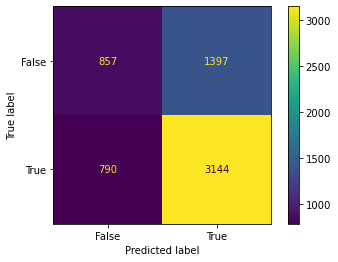

0.6825773084796897

In [23]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix

actual = y_test.array
predicted = knnpred

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()
knn.score(X_train, y_train)

In [ ]:
print(classification_report(y_test,knnpred))

### Decision Tree

In [ ]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

actual = y_test.array
predicted = dtreepred

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()
dtree.score(X_train, y_train)

In [ ]:
print(classification_report(y_test,dtreepred))

### Naive Bayes

In [ ]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

actual = y_test.array
predicted = nbpred

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()
nb.score(X_train, y_train)

In [ ]:
print(classification_report(y_test,nbpred))

#### Optimal value for k= 3 and k= 5 - Fold Cross Validation, Error Rate



In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
knn.score(X_train, y_train)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn.score(X_train, y_train)

In [ ]:
from sklearn.model_selection import cross_val_score
import numpy as np
#create a new KNN model
knn = KNeighborsClassifier(n_neighbors=5)
#train model with cv of 5 
knn_scores = cross_val_score(knn, X, y, cv=5)
#print each cv score (accuracy) and average them
print(knn_scores)
print('Scores mean:{}'.format(np.mean(knn_scores)))

### Error Rate KNN

In [ ]:
error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='violet', linestyle='dashed', marker='o',markerfacecolor='red', markersize=8)
plt.title('Error Rate vs. K Value', fontsize=18)
plt.xlabel('K',fontsize=15)
plt.ylabel('Error (misclassification) Rate',fontsize=15)


In [ ]:
print("Misclassification error rate:",round(np.mean(knnpred!=y_test),3))

#### The best classifier that predicts the data used overhere is the Decision Tree with of 71% and gives the possible needed samples. So, for clear ideal analysis the below attached tabulated were the results.

#### Procedure for calculating the Precision, Recall, Acuuracy, F1 Score

#### Precision Score = TP / (FP + TP)
#### Recall Score = TP / (FN + TP)
#### Accuracy Score = (TP + TN)/ (TP + FN + TN + FP)
#### F1 Score = 2* Precision Score * Recall Score/ (Precision Score + Recall Score/)
#### The below table address the values of confinement of different classifiers used in this dataset. The decision tree will enhance the dataset in best way of the other two classifiers. 
#### The accurate measures of the dataset which implemented with different classifiers the optimal training of the classifier will depends upon the parameters used and with of modified samples. The accuracy or either of F1 score is considered for predicting the best classifier. 

#### 1.3.	i. Plot the ROC curves for 3 different classification models.                                                                        i.i What do you learn from these ROC curve? Include the AUC in your discussion.                                                                               i.i.i Which classifier/configuration is best suited for this task? Are you satisfied with the performance?


### KNN ROC

In [ ]:
knnpred_binary = pd.get_dummies(knnpred).to_numpy()
y_test_binary = pd.get_dummies(y_test).to_numpy()

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt
knn.fit(X_train, y_train)
y_scores = knn.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test_binary.argmax(axis=1), y_scores[:, 1])
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of kNN')
plt.show()

In [ ]:
knnpred_binary = pd.get_dummies(knnpred).to_numpy()
y_test_binary = pd.get_dummies(y_test).to_numpy()

### Decision Tree ROC

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt

dtree.fit(X_train,y_train)
y_scores = dtree.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test_binary.argmax(axis=1), y_scores[:, 1])
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of Decision Tree')
plt.show()

### Naive Bayes ROC

In [ ]:
nbpred_binary = pd.get_dummies(nbpred).to_numpy()
y_test_binary = pd.get_dummies(y_test).to_numpy()

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt

nb.fit(X_train,y_train)
y_scores = nb.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test_binary.argmax(axis=1), y_scores[:, 1])
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of Naive Bayes')
plt.show()

#### The best ROC(Receiver Operating Characteristic) curve is choosed based upon AUC, the higher the AUC the better the performance of the Classification. The Navive Bayes holds the high AUC, the ROC suggests the best of outcomes that it given the possible true positive outcome and lowest false negative outcomes. Comparing the ROC for the three classifiers the obtained best of the three is the Naive Bayes, where as is of 0.68 of AUC. So, the clear consideration where the KNN is of 0.61 AUC and Decision tree is of 0.66 AUC. As, per the best accuracy is of from the decision tree and roc where which holds the max of true positive is naive bayes within of compared classification

#### 1.4. This dataset has many features. Carefully identify the most discriminating features to predict MonkeyPox using the filter and wrapper feature selection techniques. You might consider if is appropriate to remove the ”Patient ID” feature? i.Report the feature subsets that the filter and techniques select. In the case of a filter, you should propose a way to choose a subset of the ranked features, rather than using the entire original set of features, and justify your choice. In the case of wrapper techniques, carefully select features for at least one Decision Tree, one Naive Bayes and one k-NN classifier. Discuss the differences in the feature subsets produced by filter and wrapper techniques. ii. Carefully consider the evaluation measure(s) that you use for this exercise and justify why you selected the particular evaluation measure(s).


#### This is the way of how data been selected and applied filter and wrapper techniques. This is only placed as a sample and mentioned few snapshot the way filter and wrapper selected and resulted

In [ ]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

In [ ]:
df.shape

In [ ]:
[col for col in df.columns if df[col].isnull().sum() > 0]

In [ ]:
print(X_train.shape, X_test.shape)

In [ ]:
sel_ = VarianceThreshold(threshold=0)
sel_.fit(X_train)

In [ ]:
#get_support() is a boolean vector that indicates which features are retained
sum(sel_.get_support())

In [ ]:
X_train = sel_.transform(X_train)
X_test = sel_.transform(X_test)

print(X_train.shape, X_test.shape)

#### As, part of this few attached were the results of the Filter and Wrapper Techniques

### Filter techniques 

##### Using of Filters with in the datasets helps in dealing with a dataset thats holds the wide variety of variables and this is also used to select the variables in unique fashion and predicts the classifier within the given data of selected. The process of enhancing the use of filters has a process of selecting the set of all the features and by selecting it awaits the user to select the best subset that needs to be filtered and the learning algorithm selected then the uniqueness of existing data is achieved. Particularly stating the filter in general is used as a  preprocessing step, it also helps in training the algorithm faster and makes it efficient and reduces the complexity of a model and makes it easier to interpret. In filter generic set of methods where specifically not assigned. Faster compared to that of wrapper compared to time complexity. 

#### Below were the ways filter assigned and accuracy noted.

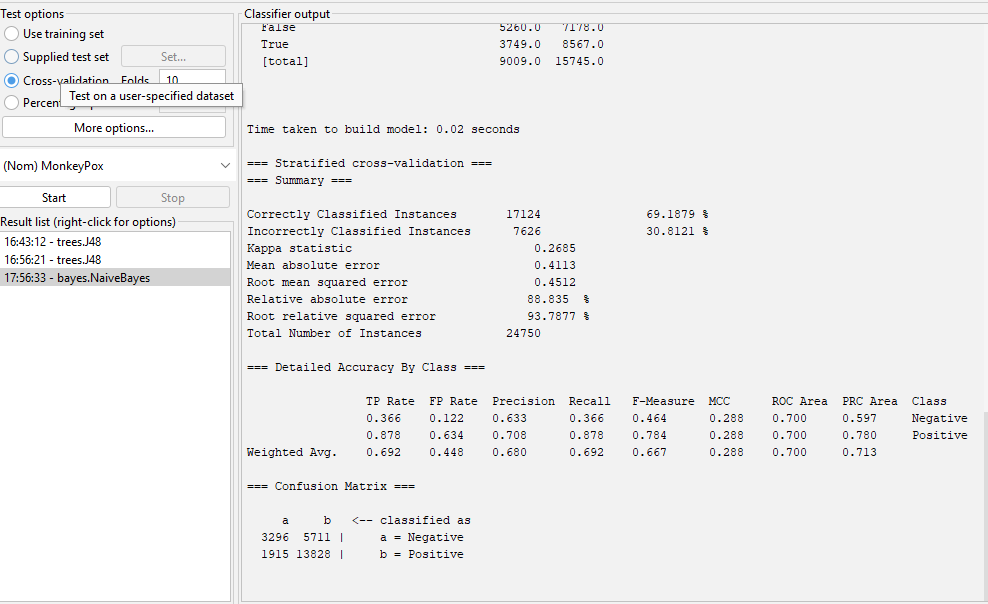

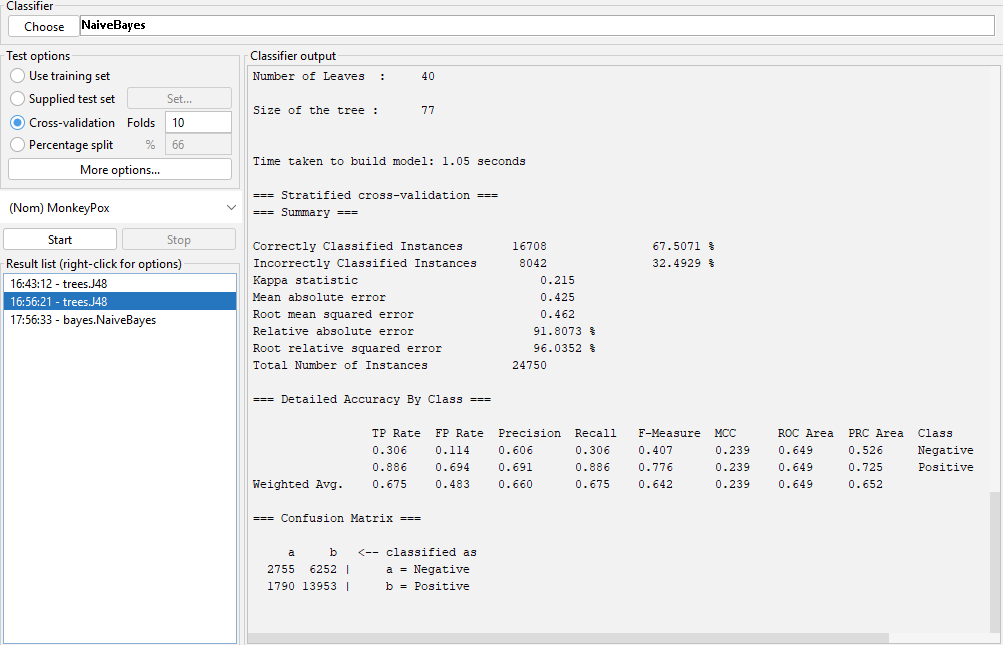

### Wrapper techniques 

#####  In wrapper techniques the selection is based on a specific machine learning algorithm that we try to fit on to the given dataset. The processed manner of the wrapper techniques it, firstly selects the initial set of features and then considers the subset of features that need to be trained and classifier selected accordingly and final model has been processed by the technique. The most common ways of selecting these techniques by best fit that improves the algorithm. It involves training the model and with different combinations of features.

### Decision Tree Wrapper Technique

#### The model is been trained by the existing algorithm by selectig  the specific variables below were few classification of (Decision Tree, Naive Bayes, KNN)  With of selected attributes the best first is been resulted as shown below

#### Forward

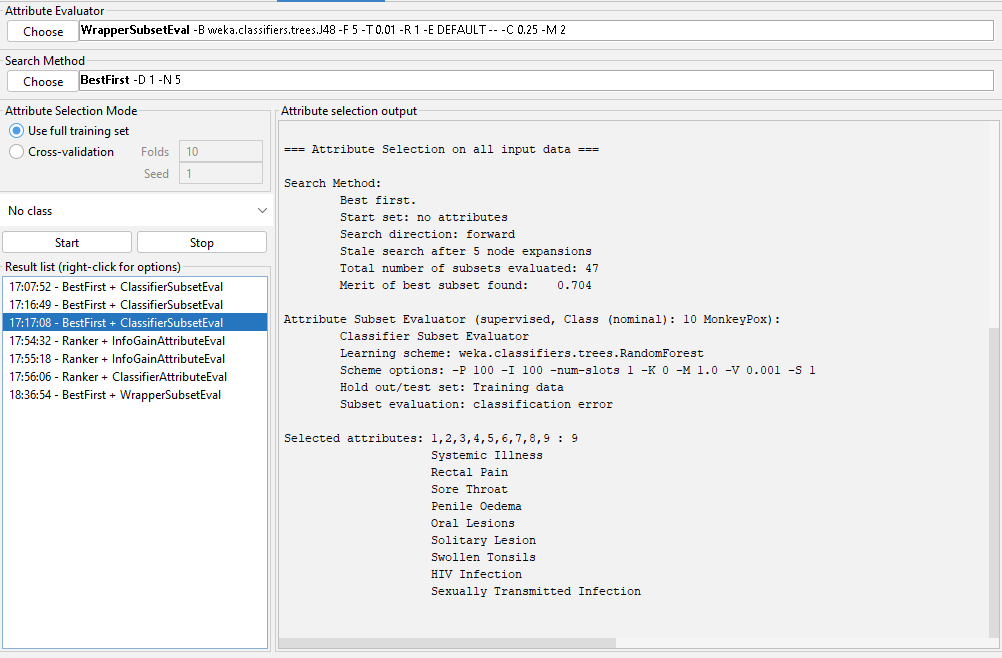

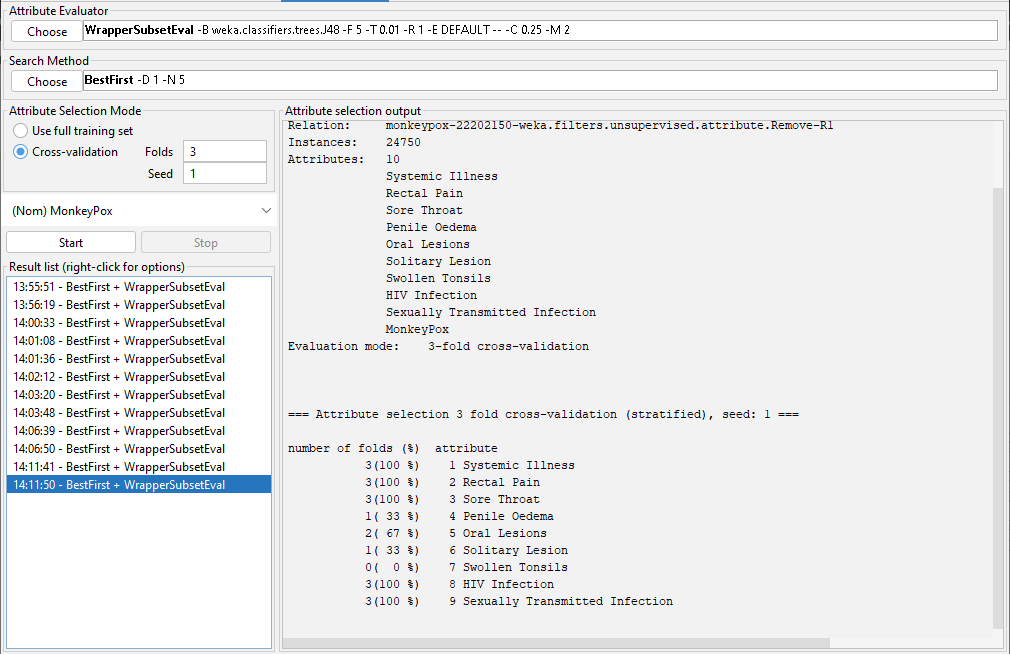

### Naive Bayes Wrapper Technique

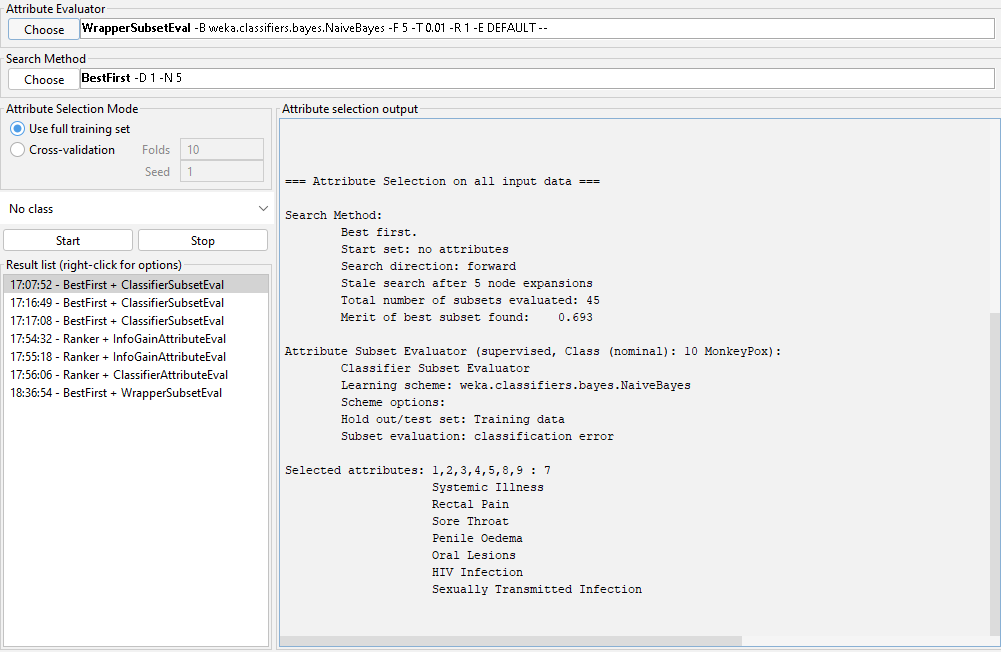

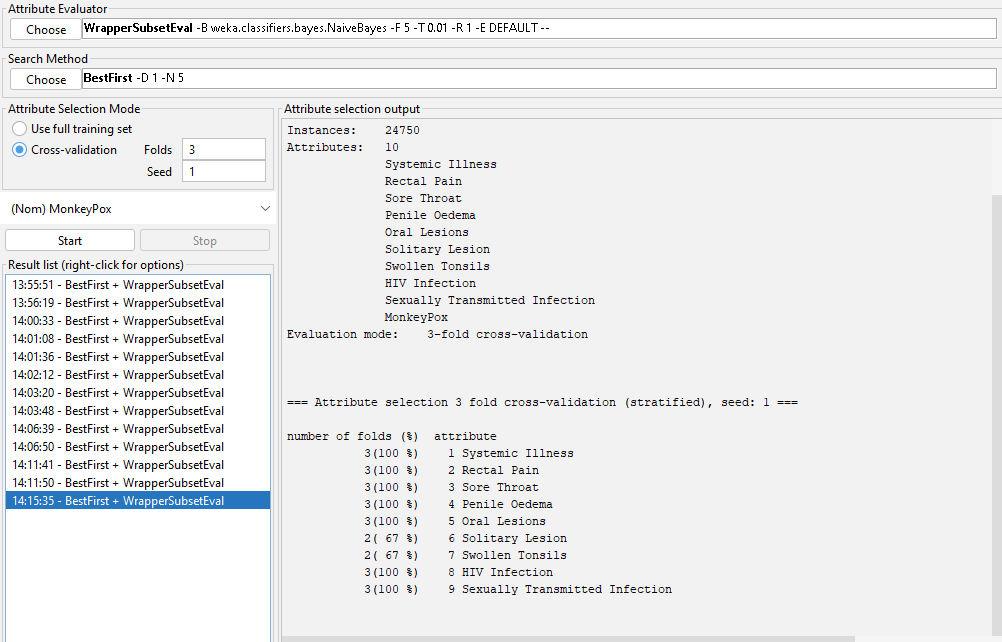

#### Backward

## Decision Tree Wrapper Technique

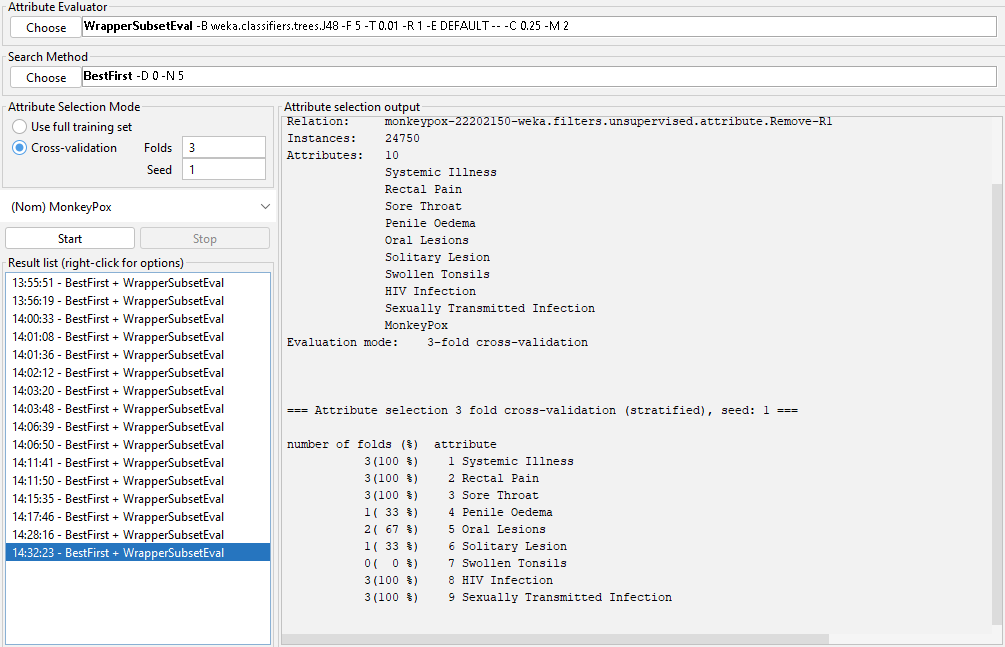

### Naive Bayes Wrapper Technique

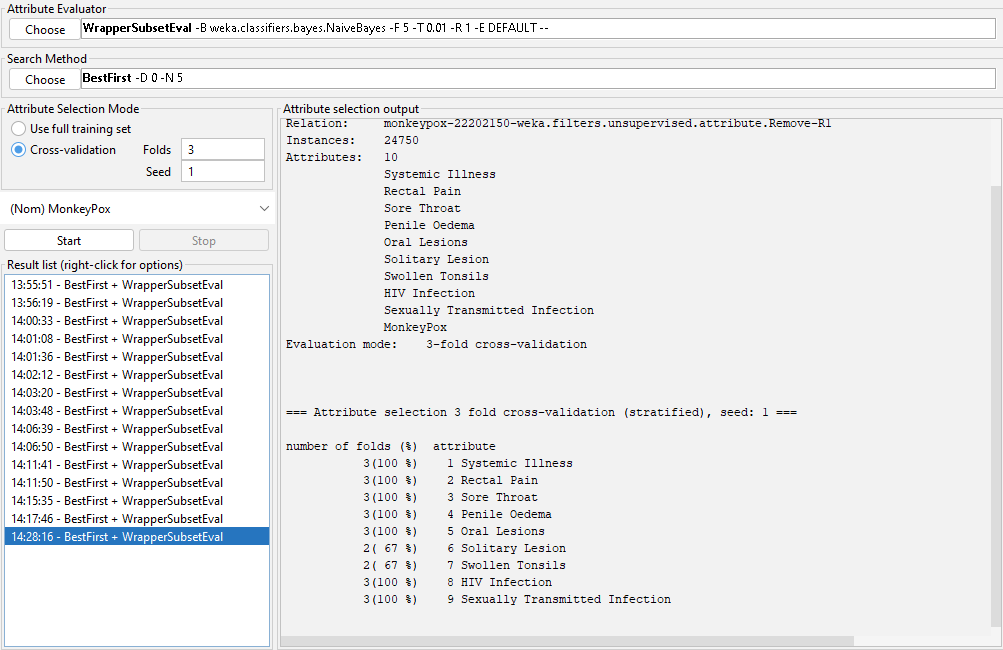

#### Evaluation measures of the features selected and while filtering the data using filters while removing the unwanted variables of considerded dataset the accuracy changes accordingly to the data present with in the data set. The data been ploted over a wide spead and removed variables is not been considerded into the accuracy calculation. It varies according to the data considerded. The wrapper techniques were used with of specific area where dataset with classification can be trained by using the bestfirst  and ranked creteria of the selected classification. With of selecting the attributes and resulting accordingly to the given classifiers. The choice of selecting the best first for my predection that the data which ever been entered will not be assign to error types and to exclude the error type picked the best first with of used classifiers.

#### 1.5. Evaluate the performance of various classifiers (including at least one Decision Tree, one Naïve Bayes and one k-NN classifier) on your dataset using the feature subset(s) identified in 1.3 i. and evaluation measures identified in 1.3 ii. Explore the effect of different parameter settings on these classifiers. Describe the evaluation procedure that you used in detail. To what extent are these results in line with or different from what you learnt about these classifiers in your lectures? For example, is your accuracy higher or lower on the dataset with reduced number of features as compared to the original dataset? Is the	[25] relative performance of different classifiers and configuration settings in line with your expectation?


#### Parameters with KNN

In [ ]:
knn = KNeighborsClassifier(n_neighbors=12,algorithm='auto',weights ='distance',metric='minkowski')
knn.fit(X_train, y_train)
knnpred = knn.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
conf_mat=confusion_matrix(y_test,knnpred)
print(conf_mat)
knn.score(X_train, y_train)

In [ ]:
print(classification_report(y_test,knnpred))

#### As, seen above the chance in the results of scores of difference in precision and recall and confusion matix. The different error plots will change accordingly and change in False positive and False negative types. The parameters of metric 'Minkowsi' where the error types vary with of the non assigned matric for the classifier. So, the classifier can be enhanced by passing the required parameters. 

#### The above KNN parameters after passing the different optimized asserts of assigned, the followedby is the assigned parameters no change is obeserved.

In [ ]:
knn = KNeighborsClassifier(n_neighbors=12,algorithm='auto',n_jobs=None, p=2,metric='euclidean')
knn.fit(X_train, y_train)
knnpred = knn.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
conf_mat=confusion_matrix(y_test,knnpred)
print(conf_mat)
knn.score(X_train, y_train)

In [ ]:
print(classification_report(y_test,knnpred))

#### This is done with of the matric euclidean, it admits the standard distance for classifier with of p value asserted. 

#### Parameters with Decision Tree

In [ ]:
dtree = DecisionTreeClassifier(criterion='entropy',splitter='random',max_depth=None,min_samples_split=12)
dtree.fit(X_train,y_train)
dtreepred = dtree.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
conf_mat=confusion_matrix(y_test,dtreepred)
print(conf_mat)
dtree.score(X_train, y_train)

In [ ]:
print(classification_report(y_test,dtreepred))

#### The decision tree is been the highest score of the followed by within given classifiers. After adding the parameters of this classifier the above were the evaluated. 

#### Parameters with Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB(var_smoothing=2e-9)
nb.fit(X_train,y_train)
nbpred = nb.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
conf_mat=confusion_matrix(y_test,nbpred)
print(conf_mat)
nb.score(X_train, y_train)

In [ ]:
print(classification_report(y_test,nbpred))

#### The above is the classification that with the parameter passed with of the smoothing assigned variable

In [ ]:
from sklearn.naive_bayes import MultinomialNB
MNB = MultinomialNB(alpha=0.6)
MNB.fit(X_train,y_train)
nbpred = MNB.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
conf_mat=confusion_matrix(y_test,nbpred)
print(conf_mat)
MNB.score(X_train, y_train)

In [ ]:
print(classification_report(y_test,nbpred))

#### The above classification is with of the Multinomial naive bayes, which is used for functional counts and it enhances with of the discrete features and samples the data with better accuracy. The error type of categeories will differ accordingly to enhance the model for best possible outcomes

In [ ]:
from sklearn.naive_bayes import BernoulliNB
BNB = BernoulliNB(fit_prior = False)
BNB.fit(X_train,y_train)
nbpred = BNB.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
conf_mat=confusion_matrix(y_test,nbpred)
print(conf_mat)
MNB.score(X_train, y_train)

In [ ]:
print(classification_report(y_test,nbpred))

#### Used above is the Bernoulli Navie Bayes, the error types of False positive, Flase negative will differ and modifies the samples that enhances the classifier best ensure the best results. 